# Regression Week 2: Multiple Regression (Interpretation)

The goal of this first notebook is to explore multiple regression and feature engineering with existing graphlab functions.

In this notebook you will use data on house sales in King County to predict prices using multiple regression. You will:
* Use SFrames to do some feature engineering
* Use built-in graphlab functions to compute the regression weights (coefficients/parameters)
* Given the regression weights, predictors and outcome write a function to compute the Residual Sum of Squares
* Look at coefficients and interpret their meanings
* Evaluate multiple models via RSS

# Fire up graphlab create

In [2]:
#import graphlab
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# define dictionary of data types
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str,
              'long':float,'sqft_lot15':float,'sqft_living':float, 'floors':str, 'condition':int,
              'lat':float, 'date':str, 'sqft_basement':int,'yr_built':int, 'id':str, 
              'sqft_lot':int, 'view':int}

# Load in house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [4]:
#sales = graphlab.SFrame('kc_house_data.gl/')
train_Data = pd.read_csv('kc_house_train_data.csv', dtype = dtype_dict)
test_Data = pd.read_csv('kc_house_test_data.csv',dtype = dtype_dict)
sales = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)
print train_Data.head(), sales.head()

           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot floors  waterfront  view     ...      grade  sqft_above  \
0      5650      1           0     0     ...          7        1180   
1      7242      2           0     0     ...          7        2170   
2     10000      1           0     0     ...          6         770   
3      5000      1           0     0     ...          7        1050   
4      8080      1           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    9

# Split data into training and testing.
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [ ]:
#train_data,test_data = sales.random_split(.8,seed=0)

## Create X and y matrix for regression

In [ ]:
X = train_Data[['sqft_living', 'bedrooms', 'bathrooms']]
X = np.array(X)
X = np.insert(X,0,1,1)     # append column of ones
y = train_Data['price']
y = y.reshape(len(y),1)
y = np.array(y)
print X[0:4,:]
print y.shape

In [5]:
y = train_Data['price']
y = y.reshape(len(y),1)
y = np.array(y)

In [ ]:
X1 = sales[['sqft_living', 'bedrooms', 'bathrooms']]
y1 = sales['price']

## X and Y test data

In [ ]:
Xtest = test_Data[['sqft_living', 'bedrooms', 'bathrooms']]
Xtest = np.array(Xtest)
Xtest = np.insert(Xtest,0,1,1)
ytest = test_Data['price']
ytest = ytest.reshape(len(ytest),1)
ytest = np.array(ytest)

# Learning a multiple regression model

Recall we can use the following code to learn a multiple regression model predicting 'price' based on the following features:
example_features = ['sqft_living', 'bedrooms', 'bathrooms'] on training data with the following code:

(Aside: We set validation_set = None to ensure that the results are always the same)

## Linear Regression first using sklearn

In [ ]:
X1.shape

In [ ]:

lr = LinearRegression(fit_intercept = True)
lr.fit(X,y)
lr.get_params
print lr.coef_, lr.intercept_
p = map(lr.predict, X)

## Now try manually


In [ ]:

print X.shape, y.shape

In [ ]:
# same as sklearn
xx = X.T.dot(X)
xy = X.T.dot(y)
coef = np.linalg.inv(xx).dot(xy)
print coef

In [ ]:
#example_features = ['sqft_living', 'bedrooms', 'bathrooms']
#example_model = graphlab.linear_regression.create(train_data, target = 'price', features = example_features, 
#               validation_set = None)

Now that we have fitted the model we can extract the regression weights (coefficients) as an SFrame as follows:

In [ ]:
#example_weight_summary = example_model.get("coefficients")
#print example_weight_summary

# Making Predictions

In the gradient descent notebook we use numpy to do our regression. In this book we will use existing graphlab create functions to analyze multiple regressions. 

Recall that once a model is built we can use the .predict() function to find the predicted values for data we pass. For example using the example model above:

In [ ]:
#example_predictions = example_model.predict(train_data)
#print example_predictions[0] # should be 271789.505878
yhat = X.dot(coef)
print yhat[0]

# Compute RSS

Now that we can make predictions given the model, let's write a function to compute the RSS of the model. Complete the function below to calculate RSS given the model, data, and the outcome.

In [6]:
def get_residual_sum_of_squares(coef,X,y):
    # First get the predictions
    yhat = X.dot(coef)
    # Then compute the residuals/errors
    err = yhat - y
    # Then square and add them up
    RSS = err.T.dot(err)
    return(RSS)    

Test your function by computing the RSS on TEST data for the example model:

In [7]:
rss_example_test = get_residual_sum_of_squares(coef,Xtest,ytest)
print rss_example_test # should be 2.7376153833e+14


NameError: name 'coef' is not defined

In [ ]:
yhat1 = Xtest.dot(coef)
err = yhat1 - ytest
RSS = err.T.dot(err)
print RSS

# Create some new features

Although we often think of multiple regression as including multiple different features (e.g. # of bedrooms, squarefeet, and # of bathrooms) but we can also consider transformations of existing features e.g. the log of the squarefeet or even "interaction" features such as the product of bedrooms and bathrooms.

You will use the logarithm function to create a new feature. so first you should import it from the math library.

In [ ]:
from math import log

Next create the following 4 new features as column in both TEST and TRAIN data:
* bedrooms_squared = bedrooms\*bedrooms
* bed_bath_rooms = bedrooms\*bathrooms
* log_sqft_living = log(sqft_living)
* lat_plus_long = lat + long 
As an example here's the first one:

In [ ]:
train_Data['bedrooms_squared'] = train_Data['bedrooms'].apply(lambda x: x**2)
test_Data['bedrooms_squared'] = test_Data['bedrooms'].apply(lambda x: x**2)

In [ ]:
# create the remaining 3 features in both TEST and TRAIN data
train_Data['log_sqft_living'] = train_Data['sqft_living'].apply(lambda x: log(x))
test_Data['log_sqft_living'] = test_Data['sqft_living'].apply(lambda x: log(x))

train_Data['bed_bath_rooms'] = train_Data['bedrooms'] * train_Data['bathrooms'] 
test_Data['bed_bath_rooms'] = test_Data['bedrooms'] * test_Data['bathrooms'] 

train_Data['lat_plus_long'] = train_Data['lat'] + train_Data['long'] 
test_Data['lat_plus_long'] = test_Data['lat']+ test_Data['long'] 


In [ ]:
print test_Data['lat_plus_long'].head()
print test_Data['lat'].head()
print test_Data['long'].head()
np.mean(test_Data['lat_plus_long'])

* Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this feature will mostly affect houses with many bedrooms.
* bedrooms times bathrooms gives what's called an "interaction" feature. It is large when *both* of them are large.
* Taking the log of squarefeet has the effect of bringing large values closer together and spreading out small values.
* Adding latitude to longitude is totally non-sensical but we will do it anyway (you'll see why)

**Quiz Question: What is the mean (arithmetic average) value of your 4 new features on TEST data? (round to 2 digits)**

In [ ]:
temp = np.mean(test_Data[['bedrooms_squared', 'log_sqft_living', 'bed_bath_rooms', 'lat_plus_long']])
print np.mean(temp)
meanbed2 = np.mean(test_Data[['bedrooms_squared']])
print meanbed2
meanbedbath = np.mean(test_Data[['bed_bath_rooms']])
print meanbedbath
meanlogsqft = np.mean(test_Data[['log_sqft_living']])
print meanlogsqft
meanlatlong = np.mean(test_Data[['lat_plus_long']])
print meanlatlong

# Learning Multiple Models

Now we will learn the weights for three (nested) models for predicting house prices. The first model will have the fewest features the second model will add one more feature and the third will add a few more:
* Model 1: squarefeet, # bedrooms, # bathrooms, latitude & longitude
* Model 2: add bedrooms\*bathrooms
* Model 3: Add log squarefeet, bedrooms squared, and the (nonsensical) latitude + longitude

In [ ]:
model_1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bed_bath_rooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

Now that you have the features, learn the weights for the three different models for predicting target = 'price' using graphlab.linear_regression.create() and look at the value of the weights/coefficients:

In [ ]:
# Learn the three models: (don't forget to set validation_set = None)
#mode 1
X1 = train_Data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']]
X1 = np.array(X1)
X1 = np.insert(X1,0,1,1)

# model 2
X2 = train_Data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms']]
X2 = np.array(X2)
X2 = np.insert(X2,0,1,1)

#model 3
X3 = train_Data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms',
                'bedrooms_squared', 'log_sqft_living', 'lat_plus_long']]
X3 = np.array(X3)
X3 = np.insert(X3,0,1,1)

## Create Test Data models

In [ ]:
yt = test_Data['price']
yt = np.array(yt)
yt = yt.reshape(len(yt), 1)
#mode 1
X1t = test_Data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']]
X1t = np.array(X1t)
X1t = np.insert(X1t,0,1,1)

# model 2
X2t = test_Data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms']]
X2t = np.array(X2t)
X2t = np.insert(X2t,0,1,1)

#model 3
X3t = test_Data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms',
                'bedrooms_squared', 'log_sqft_living', 'lat_plus_long']]
X3t = np.array(X3t)
X3t = np.insert(X3t,0,1,1)

In [ ]:
# Examine/extract each model's coefficients:
# model 1
xx1 = X1.T.dot(X1)
xy = X1.T.dot(y)
coef1 = np.linalg.inv(xx1).dot(xy)
print('Coefficients from model 1:{}'.format(coef1))

In [ ]:
# Predict house price for model 1 test set
yhat1 = X1t.dot(coef1)
print yhat1[0:3]

# Predict house price for model 2 test set
yhat2 = X2t.dot(coef2)
print yhat[0:3]
print yt[0:3]

In [ ]:
# Examine/extract each model's coefficients:
# model 2
xx2 = X2.T.dot(X2)
xy2 = X2.T.dot(y)
coef2 = np.linalg.inv(xx2).dot(xy2)
print('Coeficcients from model 2: {}'.format(coef2))

In [ ]:
# Examine/extract each model's coefficients:
# model 2
xx3 = X3.T.dot(X3)
xy3 = X3.T.dot(y)
coef3 = np.linalg.inv(xx3).dot(xy3)
print('Coeficcients from model 2: {}'.format(coef3))

**Quiz Question: What is the sign (positive or negative) for the coefficient/weight for 'bathrooms' in model 1?**
Coefficient number 4 is positive indicating that a house with one more bathroom increases the expected price of the house

**Quiz Question: What is the sign (positive or negative) for the coefficient/weight for 'bathrooms' in model 2?**
Coefficient number 4 is negative in model 2 indicating that one more bathroom reduces the price.
Probablt multicolinearity due to bedroom * bathroom variable

Think about what this means.

# Comparing multiple models

Now that you've learned three models and extracted the model weights we want to evaluate which model is best.

First use your functions from earlier to compute the RSS on TRAINING Data for each of the three models.

In [ ]:
# Compute the RSS on TRAINING data for each of the three models and record the values:
Rssmodel1 = get_residual_sum_of_squares(coef1,X1,y)
print Rssmodel1

Rssmodel2 = get_residual_sum_of_squares(coef2,X2,y)
print Rssmodel2

Rssmodel3 = get_residual_sum_of_squares(coef3,X3,y)
print Rssmodel3

**Quiz Question: Which model (1, 2 or 3) has lowest RSS on TRAINING Data?** Is this what you expected?

Model 2 has lowest error
Could be overfitting data

Now compute the RSS on on TEST data for each of the three models.


In [ ]:
# model 1
RSSmodel1test = get_residual_sum_of_squares(coef1,X1t,yt)
print RSSmodel1test

# model 2
RSSmodel2test = get_residual_sum_of_squares(coef2,X2t,yt)
print RSSmodel2test

# model 3
RSSmodel3test = get_residual_sum_of_squares(coef3,X3t,yt)
print RSSmodel3test

**Quiz Question: Which model (1, 2 or 3) has lowest RSS on TESTING Data?** Is this what you expected?Think about the features that were added to each model from the previous.

Model 2 has the lowest RSS

# Gradient Descent

In [ ]:
xx = X11.T.dot(X11)
xy = X11.T.dot(y)
Beta = np.linalg.solve(xx,xy)
print Beta

In [9]:
def addconstant(X):
    m = len(X)
    X = np.array(X)
    X = np.insert(X,0,1,1)
    X = X.reshape(len(X),X.shape[1])
    return X

In [10]:
def predict_outcome(feature_matrix, weights):
    predictions = feature_matrix.dot(weights)
    return(predictions)

In [11]:
def ComputeCost(theta,x,y):
    m = len(y)
    J = 0
    h = x.dot(theta)
    e = (y-h)
    #J = (0.5*m) * np.sum(np.square(h-y))
    J = (0.5*m) * np.sum(e.T.dot(e))
    return J  

In [12]:
# NB have to define m as float otherwise i get 0
def gradientDescent(x, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = x.dot(theta)
        theta = theta - alpha*(1/float(m))*(x.T.dot(h-y))
        J_history[iter] = ComputeCost(theta,x,y)
    return(theta, J_history)

In [18]:
# NB have to define m as float otherwise i get 0
def gradientDescent2(x, y, theta, alpha,tolerance):
    converged = False
    theta = np.array(theta)
    m = y.size
    J_history = np.zeros(num_iters)
    while not converged:
        for iter in np.arange(num_iters):
            h = x.dot(theta)
            theta = theta - alpha*(1/float(m))*(x.T.dot(h-y))
            J_history[iter] = ComputeCost(theta,x,y)
            if J_history[iter] < tolerance:
                converged = True
    return(theta, J_history)

In [ ]:
intial_weights = initial_weights.reshape(2,1)
print X11.shape, initial_weights.shape

In [13]:

X11 = train_Data['sqft_living']
#X11 = addconstant(X11)

X11 = np.array(X11)
X11 = X11.reshape(len(X11),1)
X11 = np.insert(X11,0,1,1)

X11t = test_Data['sqft_living']
#X11t = addconstant(X11t)
X11t = np.array(X11t)
X11t = X11t.reshape(len(X11t),1)
X11t = np.insert(X11t,0,1,1)

X12 = train_Data[['sqft_living','sqft_living15']]
X12 = addconstant(X12)
#X12 = np.array(X12)
#X12 = np.insert(X12,0,1,1)

X12t = test_Data[['sqft_living','sqft_living15']]
#X12t = np.array(X12t)
#X12t = np.insert(X12t,0,1,1)
X12t = addconstant(X12t)

## Test Gradient Descent

## Very important to set correct alpha

In [19]:
# Test gradient descent
# very important to correctly set dimension for theta
initial_theta = np.zeros((X11.shape[1],1))
initial_theta1 = [[-47000., 1.]]
initial_theta1 = np.array(initial_theta1)
initial_theta1 = initial_theta1.reshape(2,1)
alpha = 0.000000001 # NB was getting NA with a higher alpha
num_iters = 1500
tolerance = 2.5e7

In [253]:
initial_theta2 = [-100000, 1, 1]
initial_theta2 = np.array(initial_theta2)
initial_theta2 = initial_theta2.reshape(3,1)

In [23]:
# theta for minimized cost J
theta , Cost_J = gradientDescent2(X11, y, initial_theta1, 0.0000000004, tolerance)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
print lr.coef_ , lr.intercept_#
pred = X11t.dot(theta)
print pred[0:4]

KeyboardInterrupt: 

## Model 2 Gradient Descent

('theta2: ', array([-46999.88718545,    281.79518722]))
predicted value of house is: [[ 401200.52027118]
 [ 714658.6692434 ]
 [ 342099.68062487]
 ..., 
 [ 694951.34248974]
 [ 560000.73805039]
 [ 221766.05787767]]
real value of house is: [[ 221900.]
 [ 538000.]
 [ 180000.]
 ..., 
 [ 360000.]
 [ 400000.]
 [ 325000.]]
Predicted price 1st house using model 2: [[ 401200.52027118]
 [ 714658.6692434 ]
 [ 342099.68062487]
 [ 669074.99786303]
 [ 312552.70241989]]


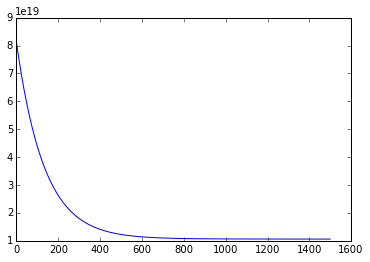

In [338]:
theta2 , Cost_J1 = gradientDescent(X12, y, initial_theta2, 0.0000000004, num_iters)
print('theta2: ',theta.ravel())
plt.plot(Cost_J1)

#predicted values
pred2 = X12t.dot(theta2)
print('predicted value of house is: {}'.format(pred2))
print('real value of house is: {}'.format(y))
pred2 = X12t.dot(theta2)
print('Predicted price 1st house using model 2: {}'.format(pred2[0:5]))

## changing values of alpha

('theta2: ', array([-46999.88718545,    281.79518722]))
predicted value of house is: [[ 401200.52027118]
 [ 714658.6692434 ]
 [ 342099.68062487]
 ..., 
 [ 694951.34248974]
 [ 560000.73805039]
 [ 221766.05787767]]
real value of house is: [[ 221900.]
 [ 538000.]
 [ 180000.]
 ..., 
 [ 360000.]
 [ 400000.]
 [ 325000.]]
Predicted price 1st house using model 2: [[ 401200.52027118]
 [ 714658.6692434 ]
 [ 342099.68062487]
 [ 669074.99786303]
 [ 312552.70241989]]


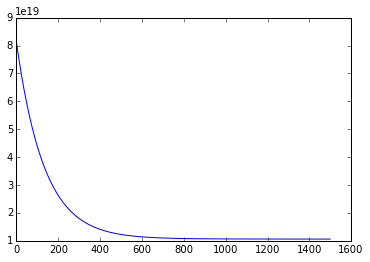

In [304]:
theta2 , Cost_J1 = gradientDescent(X12, y, initial_theta2, 0.0000000004, num_iters)
print('theta2: ',theta.ravel())
plt.plot(Cost_J1)

#predicted values
pred2 = X12t.dot(theta2)
print('predicted value of house is: {}'.format(pred2))
print('real value of house is: {}'.format(y))
pred2 = X12t.dot(theta2)
print('Predicted price 1st house using model 2: {}'.format(pred2[0:5]))

In [35]:
lr = LinearRegression(fit_intercept = True)
lr.fit(X11,y)
lr.get_params
print lr.coef_, lr.intercept_

pred1 = -47116.07907289 + 281.95*1.43000000e+03
print pred1

[[   0.          281.95883963]] [-47116.07907289]
356072.420927


In [ ]:
p = map(lr.predict, X11t)
print p[0:4]
p = X11t.dot(theta)
pred = X11t[0] + theta * X11t[1]

In [36]:
lr = LinearRegression(fit_intercept = True)
lr.fit(X12,y)
lr.get_params
print lr.coef_, lr.intercept_

[[   0.          245.18871442   65.27158522]] [-100262.17515853]


In [ ]:
#RSS for model 1
get_residual_sum_of_squares(theta)

In [280]:
p = p = map(lr.predict, X12t)
print p[0]

[[ 366541.10816718]]


In [37]:
X12t[0:2,:]

array([[  1.00000000e+00,   1.43000000e+03,   1.78000000e+03],
       [  1.00000000e+00,   2.95000000e+03,   2.14000000e+03]])

In [38]:
pred2 = -100262.17515853 + 245.18871442*1.43000000e+03  + 65.27158522*1.78000000e+03
print pred2

366541.108154
